In [1]:
import pandas as pd
from config import *

df = pd.read_csv('source/tourist_arrivals_countries.csv', parse_dates=['Date'])
df.head()

,Date,IT,FR,DE,PT,ES,UK
0,1990-01-01,2543920.0,NaN,3185877.0,325138.0,1723786.0,1776000.0
1,1990-02-01,2871632.0,NaN,3588879.0,381539.0,1885718.0,2250000.0
2,1990-03-01,3774702.0,NaN,4272437.0,493957.0,2337847.0,2662000.0
3,1990-04-01,5107712.0,NaN,4689424.0,635822.0,3172302.0,2645000.0
4,1990-05-01,4738376.0,NaN,6045278.0,609952.0,3072480.0,3096000.0


Prepare the dataset (See Altair Example)

In [2]:
df2 = pd.melt(df, id_vars='Date', value_name='Tourist Arrivals', var_name='Country')
mask_fr = df['FR'].isnull() == False
mask_uk = df['UK'].isnull() == False
mask_es = df['ES'].isnull() == False
df = df[(mask_fr) & (mask_uk) & (mask_es)]
df2 = df.copy()
df2.loc[:, 'Year'] = df['Date'].dt.year
df2 = df2.groupby(by='Year').mean(numeric_only=True)
df2 = df2.iloc[[0, -2]]
df2.reset_index(inplace=True)
df3 = pd.melt(df2, id_vars='Year',value_name='Tourist Arrivals', var_name='Country')
mask = df3['Country'] == 'PT'
df4 = df3.loc[~mask].groupby('Year').mean().reset_index()
df4['Country'] = 'Others (mean)'
df5 = df3.loc[mask].append(df4, ignore_index=True)
mask_first = df5['Year'] == 1994
mask_last = df5['Year'] == 2018
mask_pt = df5['Country'] == 'PT'
mask_ot = df5['Country'] == 'Others (mean)'

pi_pt = (df5[mask_last & mask_pt]['Tourist Arrivals'].values[0] - \
        df5[mask_first & mask_pt]['Tourist Arrivals'].values[0]) / \
        df5[mask_first & mask_pt]['Tourist Arrivals'].values[0]*100

pi_ot = (df5[mask_last & mask_ot]['Tourist Arrivals'].values[0] - \
        df5[mask_first & mask_ot]['Tourist Arrivals'].values[0]) / \
        df5[mask_first & mask_ot]['Tourist Arrivals'].values[0]*100

df_pi = pd.DataFrame({
    'Date'    : [1994,2018,1994,2018],
    'Country' : ['PT', 'PT', 'Others (mean)', 'Others (mean)'],
    'Tourist Arrivals' : [0, pi_pt, 0, pi_ot]
})

Draw the chart

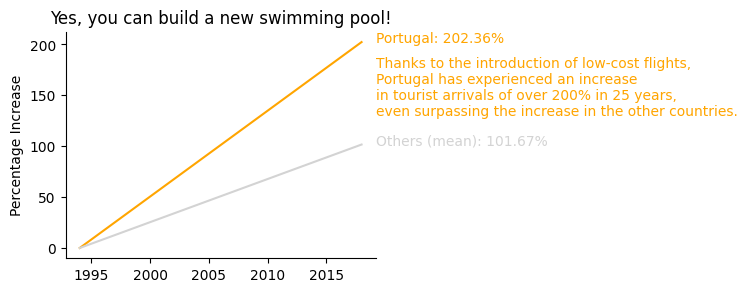

In [25]:
from matplotlib.transforms import blended_transform_factory
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(4,3),dpi=100)

for country in df_pi['Country'].unique():
    data = df_pi[df_pi['Country'] == country]
    ax.plot(data['Date'], 
            data['Tourist Arrivals'], 
            label=country, 
            color='orange' if country == 'PT' else 'lightgrey')

trans = blended_transform_factory(x_transform=ax.transAxes, y_transform=ax.transData)
ax.annotate('Others (mean): ' + '{:.2f}'.format(pi_ot) + '%', 
            xy=[1,pi_ot],xycoords=trans,
            ha='left',
            color='lightgrey')

ax.annotate('Portugal: ' + '{:.2f}'.format(pi_pt) + '%', 
            xy=[1,pi_pt],
            xycoords=trans,
            ha='left',
            color='orange')

annotation = f"""Thanks to the introduction of low-cost flights, 
Portugal has experienced an increase 
in tourist arrivals of over 200% in 25 years, 
even surpassing the increase in the other countries."""

ax.annotate(annotation,
           xy=[1,130],
           xycoords=trans,
           ha='left',
           color='orange')

plt.title('Yes, you can build a new swimming pool!')
plt.ylabel('Percentage Increase')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("chart.svg",bbox_inches='tight')
#plt.show()

<Figure size 432x288 with 0 Axes>